## Casos A Nível Mundial

Nesta seccção irão ser estudados os casos a nível mundial, desta forma irá ser avaliada a evolução do número de casos confirmados, do número de recuperados, o número de mortes, bem como a percentagem de infetados relativamente ao dia anterior.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from datetime import date

In [2]:
from requests import get  # to make GET request

import wget
os.remove("Data/worldwide-aggregated.CSV")

def download(url, file_name):
    # open in binary mode
    with open(file_name, "wb") as file:
        # get request
        response = get(url)
        # write to file
        file.write(response.content)

download("https://datahub.io/core/covid-19/r/worldwide-aggregated.csv","Data/worldwide-aggregated.csv")

In [3]:
df=pd.read_csv("Data/worldwide-aggregated.csv", delimiter=",", skiprows=[1], parse_dates=['Date'],index_col= ['Date'],)

 ### Evolução Do Número de Casos Confirmados


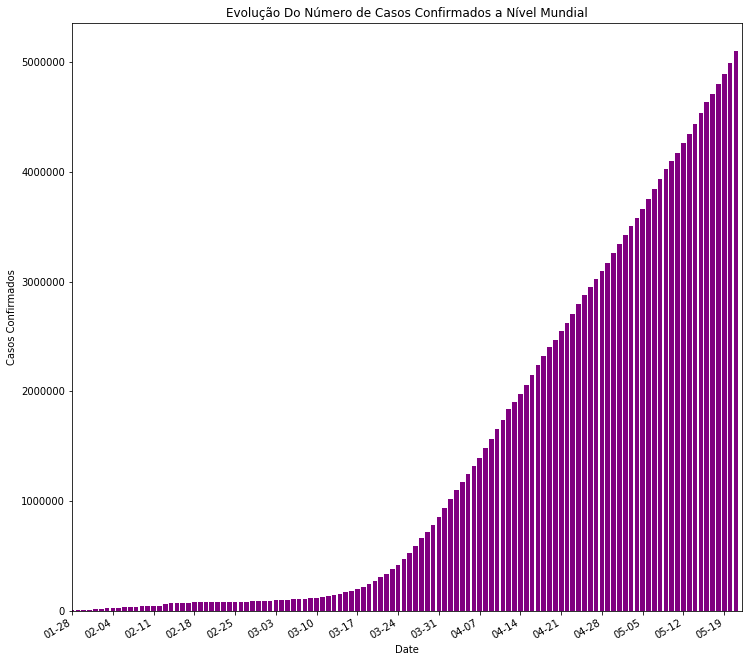

In [4]:
today = date.today()
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.bar(df.index.values,
       df['Confirmed'],
       color='purple')
fig.autofmt_xdate()

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Casos Confirmados",
       title="Evolução Do Número de Casos Confirmados a Nível Mundial",
       xlim=["2020-01-28", today])

# Define the date format
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

plt.savefig('figuras/graf.EVconfirmados.jpg', bbox_inches='tight')
plt.show()

 ### Evolução Do Número de Recuperados

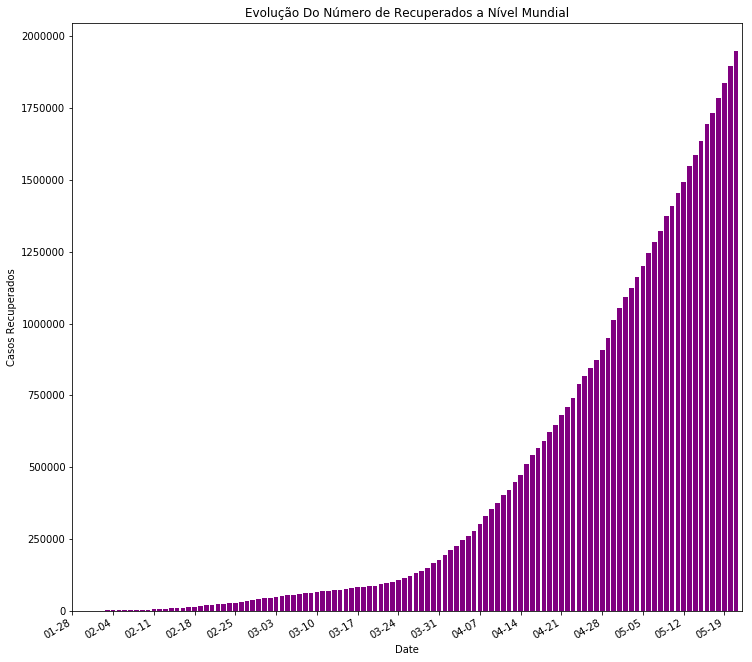

In [5]:
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.bar(df.index.values,
       df['Recovered'],
       color='purple')
fig.autofmt_xdate()

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Casos Recuperados",
       title="Evolução Do Número de Recuperados a Nível Mundial",
       xlim=["2020-01-28", today])

# Define the date format
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

plt.savefig('figuras/graf.EVrecuperados.jpg', bbox_inches='tight')
plt.show()

 ### Evolução Do Número de Mortes

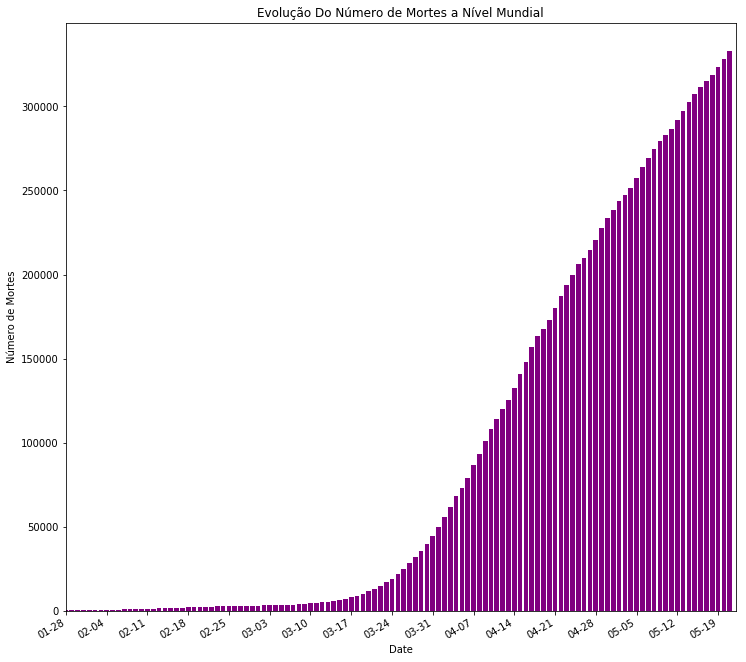

In [6]:
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.bar(df.index.values,
       df['Deaths'],
       color='purple')
fig.autofmt_xdate()

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Número de Mortes",
       title="Evolução Do Número de Mortes a Nível Mundial",
       xlim=["2020-01-28", today])

# Define the date format
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

plt.savefig('figuras/graf.EVmortes.jpg', bbox_inches='tight')
plt.show()

### Evolução Da Percentagem de Infetados

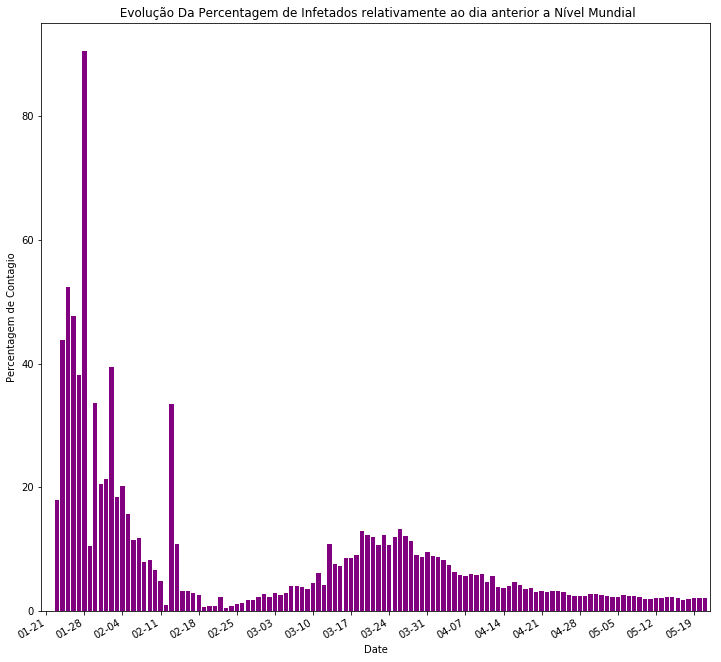

In [7]:
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.bar(df.index.values,
       df['Increase rate'],
       color='purple')
fig.autofmt_xdate()

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Percentagem de Contagio",
       title=" Evolução Da Percentagem de Infetados relativamente ao dia anterior a Nível Mundial",
       xlim=["2020-01-20", today])

# Define the date format
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

plt.savefig('figuras/graf.EVinfetados.jpg', bbox_inches='tight')
plt.show()

### Comparação entre a evolução do Número de Mortes, Recuperados e Confirmados

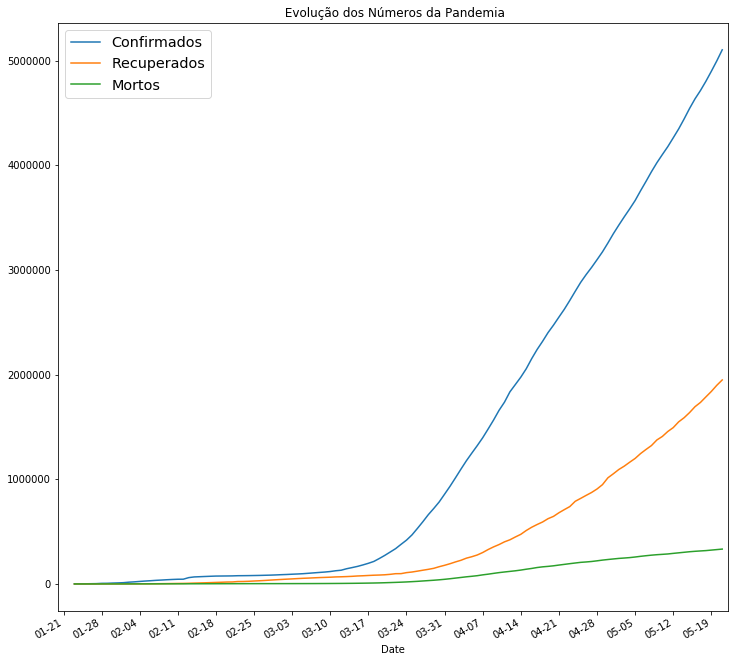

In [8]:
fig, ax = plt.subplots(figsize=(12, 12))

x = df.index.values
y_1 = df['Confirmed']
y_2 = df['Recovered']
y_3 = df['Deaths']

plt.plot(x, y_1)
plt.plot(x, y_2)
plt.plot(x, y_3)

# Define the date format
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

fig.autofmt_xdate()

# Set title and labels for axes
ax.set(xlabel="Date",
       title=" Evolução dos Números da Pandemia",
       xlim=["2020-01-20", today])

# Define the date format
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

plt.legend(['Confirmados', 'Recuperados', 'Mortos'], loc='upper left', fontsize="x-large")
plt.savefig('figuras/EVpandemia.jpg', bbox_inches='tight')
plt.show()

C:\PROGRA~1\QGIS3~1.10\apps\Python37\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
C:\PROGRA~1\QGIS3~1.10\apps\Python37\lib\site-packages\matplotlib\__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
C:\PROGRA~1\QGIS3~1.10\apps\Python37\lib\site-packages\matplotlib\__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


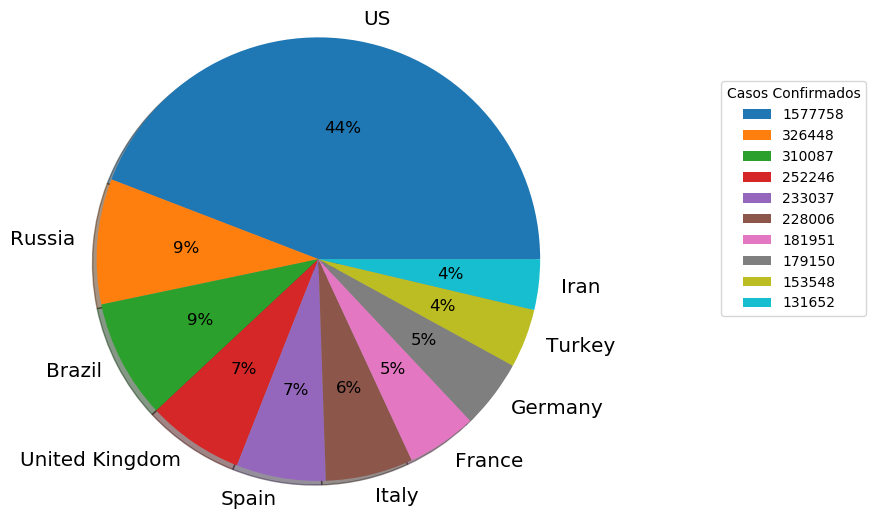

In [9]:
#importar os dados
country_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')

# mudar o nome das colunas em minusclas e otrocar o nome de country/region para country
country_df.columns = map(str.lower, country_df.columns)
country_df = country_df.rename(columns={'country_region': 'country'})


sorted_country_df = country_df.sort_values('confirmed', ascending= False)
sorted_country_df=sorted_country_df.head(10)

from IPython.core.display import display, HTML
display(HTML('<h1><center>Top 10 países com mais casos confirmados</center></h1>'))

plt.rcParams.update(plt.rcParamsDefault)
country = sorted_country_df['country']
totalCases = sorted_country_df["confirmed"]

x=[]
y=[]
x=list(totalCases) 
y=list(country)

patches, texts, autotexts = plt.pie(x, labels=y,
                                          autopct='%.0f%%',
                                          textprops={'size': 'x-large'},
                                          shadow=True, radius=1.5) 
         

plt.setp(autotexts, size='large')

plt.legend(patches,totalCases,title="Casos Confirmados", loc='best', bbox_to_anchor=(1,1, 1, 0))

plt.savefig('figuras/pieCountries.jpg', bbox_inches='tight')

plt.show()